# Data Gathering

In [256]:
import pandas as pd
import requests
import numpy as np
import tweepy
import json
import matplotlib.pyplot as plt

# first import the file we downloaded manually and uploaded to our directory

twitter_archive = pd.read_csv('/home/workspace/x.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# then we import the file from Udacity server using the url and requests library
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
# saving the file in our directory
open('image-predictions.tsv', 'wb').write(r.content)
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
# authentication process to get to twitter API
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)
# authentication confirmation
try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")
    
# accessing twitter API via tweepy library    
api = tweepy.API(auth, wait_on_rate_limit=True,
    wait_on_rate_limit_notify=True)    

## Another solution to get the needed data directly without saving tweets JSON in a text file
#tweet_id_list = twitter_archive["tweet_id"].tolist()
# retweet_counts = []
# favourite_counts = []
# for tweet_id in tweet_id_list:
#     try:  
#         tweet_status = api.get_status(tweet_id , tweet_mode='extended')
#         retweet_counts.append(tweet_status._json["retweet_count"])
#     except:
#         retweet_counts.append('NaN')
        
# for tweet_id in tweet_id_list:
#     try:  
#         tweet_status = api.get_status(tweet_id , tweet_mode='extended')
#         favourite_counts.append(tweet_status._json["favourite_count"])
#     except:
#         retweet_counts.append('NaN')

# after a trial i found that some tweet don't exist anymore so i separated valid tweets from tweets giving error

tweet_id_list = twitter_archive["tweet_id"].tolist()
valid_tweet_ids = []
error_tweet_ids = []

for tweet_id in tweet_id_list:   
    try:
        valid_tweet_ids.append(api.get_status(tweet_id , tweet_mode='extended'))
    except:
        error_tweet_ids.append(tweet_id)
        
# adding jsons for each valid tweet in a textfile 
list_of_jsons = []
for tw in valid_tweet_ids:
    list_of_jsons.append(tw._json)
# saving the file    
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(list_of_jsons))        
              

Authentication OK
Rate limit reached. Sleeping for: 742
Rate limit reached. Sleeping for: 744


In [4]:
# extracting retweets and favorites counts data from 'tweet_json.txt' to create a dataframe
df_list = []
with open('tweet_json.txt', 'r') as json_file:
    data = json.load(json_file)
    for line in data:

        df_list.append({'tweet_id': line["id"],'retweet_count': line["retweet_count"],'favorite_count': line["favorite_count"]})

# Creating the dataframe
r_f_counts= pd.DataFrame(df_list, columns = ['tweet_id','retweet_count', 'favorite_count'])
r_f_counts.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7548,35711
1,892177421306343426,5594,30871
2,891815181378084864,3705,23210
3,891689557279858688,7731,39006
4,891327558926688256,8332,37261


# Data Assessing
## twitter_archive

In [5]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
1352,703774238772166656,NaN,NaN,2016-02-28 02:50:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""YOU CAN'T HANDLE THE TRUTH"" both 10/10 https:...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/703774238...,10,10,None,None,None,None,None
284,838921590096166913,NaN,NaN,2017-03-07 01:17:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arlo. He's officially the king of snow...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/838921590...,13,10,Arlo,None,None,None,None
94,874012996292530176,NaN,NaN,2017-06-11 21:18:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,None,None,None,puppo
798,772877495989305348,NaN,NaN,2016-09-05 19:22:09 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",You need to watch these two doggos argue throu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772877495...,11,10,None,None,None,None,None


In [6]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [8]:
#checking for tweets with no images as they should be removed
len(twitter_archive.tweet_id) - len(twitter_archive[twitter_archive.tweet_id.isin(image_predictions.tweet_id)])

281

In [9]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [10]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
Sadie         8
the           8
an            7
Buddy         7
Bailey        7
Toby          7
Daisy         7
Bella         6
Milo          6
Koda          6
Stanley       6
Scout         6
Rusty         6
Jack          6
Leo           6
Dave          6
Jax           6
Oscar         6
very          5
           ... 
Skittle       1
Vixen         1
Berkeley      1
Banditt       1
Mollie        1
Danny         1
Karl          1
Nida          1
Lenox         1
Rodman        1
Link          1
JD            1
Traviss       1
Diogi         1
Millie        1
Jameson       1
Sephie        1
Bode          1
Lilli         1
Arlen         1
Julius        1
Batdog        1
Kuyu          1
Adele         1
Joey          1
Glenn         1
Mingus        1
Billy         1
Zooey         1
Rascal        1
Name: name, Length: 957,

In [11]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

Quality Issues for twitter_archive :
    1. we have 181 retweets should be removed
    2.timestamp column is string not a timestamp
    3.some columns should be removed like retweeted_status_id , retweeted_status_user_id , retweeted_status_timestamp...etc
    4. we have 281 tweets without images should be removed
    5.unnecessary html format of source column
    6.some wrong dog names like a, an, the and his
    7.numenator very high values and very low values (less than 10)
    8.denominator values that are not 10
    9.78 replies should be removed
Tidiness issues for twitter_archive :
    1. doggo, floffer, pupper and puppo columns should be merged as they represent one one parameter (dog stage)

## image_predictions

In [13]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2035,884162670584377345,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True
1078,717790033953034240,https://pbs.twimg.com/media/CfYaOeMWQAAGfyP.jpg,1,car_mirror,0.819106,False,minibus,0.107383,False,cab,0.034846,False
1326,757354760399941633,https://pbs.twimg.com/media/CoKqIndWgAAattd.jpg,1,Italian_greyhound,0.914667,True,whippet,0.047774,True,ice_lolly,0.015477,False
1821,834574053763584002,https://pbs.twimg.com/media/C5UAqgyXAAAbMWH.jpg,1,toilet_tissue,0.262936,False,golden_retriever,0.226564,True,bathtub,0.078879,False
517,676440007570247681,https://pbs.twimg.com/media/CWMyl9EWUAAnZJ0.jpg,2,Maltese_dog,0.579472,True,toy_poodle,0.133446,True,Shih-Tzu,0.094397,True


In [14]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


Quality issues for image_predictions :

    1.rows that don't have dog images should be removed (p1_dog , p2_dog , and p3_dog are false)
    2.only the breed with the highest conf should be kept and remove others and create new column called (dog breed)
    
Tidiness issues for image_predictions :

    1.the whole dataframe should be merged with twitter_archive (

## r_f_counts

In [16]:
r_f_counts.sample(5)

,tweet_id,retweet_count,favorite_count
1802,676430933382295552,325,1349
368,826958653328592898,4943,21492
1945,673295268553605120,2977,7157
1911,673956914389192708,902,1865
955,749981277374128128,2427,5070


In [17]:
r_f_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [18]:
r_f_counts.describe()

,tweet_id,retweet_count,favorite_count
count,2.331000e+03,2331.00000,2331.000000
mean,7.419079e+17,2654.26598,7461.281853
std,6.823170e+16,4489.34126,11584.513675
min,6.660209e+17,1.00000,0.000000
25%,6.782670e+17,537.00000,1297.000000
50%,7.182469e+17,1242.00000,3243.000000
75%,7.986692e+17,3083.00000,9139.000000
max,8.924206e+17,76285.00000,153970.000000


Tidiness issues for r_f_counts :

    1.this dataframe should be merged with twitter_archive dataframe

## Summary for data assessing

###      Quality issues : 
        1. we have 181 retweets should be removed
        2.timestamp column is string not a timestamp
        3.Columns should be removed like retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp...etc
        4.we have 281 tweets without images should be removed
        5.unnecessary html format of source column
        6.some wrong dog names like a, an, the and his
        7.numenator very high values and very low values (less than 10)
        8.denominator values that are not 10
        9.78 replies should be removed
        10.rows that don't have dog images should be removed (p1_dog , p2_dog , and p3_dog are false)
        11.only the breed with the highest conf should be kept and remove others and create new column called (dog breed)
        
###      Tidiness issues :
        1.doggo, floofer, pupper and puppo columns should be merged as they represent one one parameter (dog stage)
        2.all three dataframes should be merged as they are relevant

# Data Cleaning

In [223]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
r_f_counts_clean = r_f_counts.copy()

## Tidiness issues

### 1.doggo, floofer, pupper and puppo columns should be merged as they represent one one parameter (dog_stage)

### Define 
since each dog has only one stage so it is unnecessary to have 4 columns 

### Code

In [224]:
twitter_archive_clean['doggo'].replace('None',twitter_archive_clean['floofer'], inplace = True)
twitter_archive_clean['doggo'].replace('None',twitter_archive_clean['pupper'], inplace = True)
twitter_archive_clean['doggo'].replace('None',twitter_archive_clean['puppo'], inplace = True)

In [225]:
twitter_archive_clean.drop(['floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

twitter_archive_clean.rename(columns={"doggo": "dog_stage"}, inplace = True)

### Test

In [226]:
twitter_archive_clean.info() , twitter_archive_clean.dog_stage.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     2356 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


(None, None       1976
 pupper      245
 doggo        97
 puppo        29
 floofer       9
 Name: dog_stage, dtype: int64)

###  2.all three dataframes should be merged as they are relevant

### Define 
as all data in the 3 dataframes are relevant it will be easier for us to merge the 3 of them

## the 281 tweets without jpg_url will be removed (Quality issue no. 4)

### Code


In [227]:
twitter_archive_master = twitter_archive_clean.merge(image_predictions_clean,on='tweet_id').merge(r_f_counts_clean,on='tweet_id')

In [228]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 27 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
dog_stage                     2059 non-null object
jpg_url                       2059 non-null object
img_num                       2059 non-null int64
p1                            2059 non-null object
p1_conf                       2059 n

## Quality issues

### 1.rows that don't have dog images should be removed (p1_dog , p2_dog , and p3_dog are false)

###  2.only the breed with the highest conf should be kept and remove others and create new column called (breed)

### Code 

In [229]:
breed = []
conf= []

def breed_conf(row):
    if row['p1_dog']:
        breed.append(row['p1'])
        conf.append(row['p1_conf'])
    elif row['p2_dog']:
        breed.append(row['p2'])
        conf.append(row['p2_conf'])
    elif row['p3_dog']:
        breed.append(row['p3'])
        conf.append(row['p3_conf'])
    else:
        breed.append('None')
        conf.append(0)

twitter_archive_master.apply(breed_conf, axis = 1)

twitter_archive_master['breed'] = breed
twitter_archive_master['confidence'] = conf

In [230]:
twitter_archive_master = twitter_archive_master.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

### Test

In [231]:
twitter_archive_master.breed.value_counts() , twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 19 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
dog_stage                     2059 non-null object
jpg_url                       2059 non-null object
retweet_count                 2059 non-null int64
favorite_count                2059 non-null int64
breed                         2059 no

(None                           322
 golden_retriever               173
 Labrador_retriever             110
 Pembroke                        95
 Chihuahua                       93
 pug                             65
 toy_poodle                      51
 chow                            51
 Samoyed                         45
 Pomeranian                      42
 malamute                        34
 cocker_spaniel                  33
 Chesapeake_Bay_retriever        31
 French_bulldog                  30
 miniature_pinscher              26
 Cardigan                        23
 Eskimo_dog                      22
 German_shepherd                 21
 beagle                          21
 Staffordshire_bullterrier       20
 Siberian_husky                  20
 Shih-Tzu                        20
 Maltese_dog                     19
 Shetland_sheepdog               19
 kuvasz                          19
 Lakeland_terrier                19
 Rottweiler                      19
 basset                     

### 3.we have 181 retweets should be removed (72 by now after the cleaning done)

### Code

In [232]:
twitter_archive_master = twitter_archive_master[twitter_archive_master.retweeted_status_id.isnull()]
twitter_archive_master.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'] ,inplace = True , axis = 1)

### Test

In [233]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 16 columns):
tweet_id                 1987 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1987 non-null object
source                   1987 non-null object
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null int64
rating_denominator       1987 non-null int64
name                     1987 non-null object
dog_stage                1987 non-null object
jpg_url                  1987 non-null object
retweet_count            1987 non-null int64
favorite_count           1987 non-null int64
breed                    1987 non-null object
confidence               1987 non-null float64
dtypes: float64(3), int64(5), object(8)
memory usage: 263.9+ KB


### 4. 78 replies should be removed

### Code

In [234]:
twitter_archive_master = twitter_archive_master[twitter_archive_master.in_reply_to_status_id.isnull()]
twitter_archive_master.drop(['in_reply_to_status_id', 'in_reply_to_user_id'] ,inplace = True , axis = 1)

### Test

In [235]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2058
Data columns (total 14 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null object
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
dog_stage             1964 non-null object
jpg_url               1964 non-null object
retweet_count         1964 non-null int64
favorite_count        1964 non-null int64
breed                 1964 non-null object
confidence            1964 non-null float64
dtypes: float64(1), int64(5), object(8)
memory usage: 230.2+ KB


### 5.unnecessary html format of source column

### Code

In [236]:
twitter_archive_master.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1926
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [237]:
twitter_archive_master['source'] = twitter_archive_master['source'].replace(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],['Twitter for iPhone','Twitter Web Client', 'TweetDeck'])

### Test

In [238]:
twitter_archive_master.source.value_counts()

Twitter for iPhone    1926
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

### 6.timestamp column is string not a timestamp ( and changing other formats like source, dog_stage , breed, rating_numerator and rating_denominator)

### Code

In [239]:
twitter_archive_master['timestamp'] =  pd.to_datetime(twitter_archive_master['timestamp'])
twitter_archive_master.source = twitter_archive_master.source.astype('category')
twitter_archive_master.dog_stage = twitter_archive_master.dog_stage.astype('category')
twitter_archive_master.breed = twitter_archive_master.breed.astype('category')
twitter_archive_master.rating_numerator = twitter_archive_master.rating_numerator.astype('float')
twitter_archive_master.rating_denominator = twitter_archive_master.rating_denominator.astype('float')

### Test

In [240]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2058
Data columns (total 14 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null datetime64[ns]
source                1964 non-null category
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null float64
rating_denominator    1964 non-null float64
name                  1964 non-null object
dog_stage             1964 non-null category
jpg_url               1964 non-null object
retweet_count         1964 non-null int64
favorite_count        1964 non-null int64
breed                 1964 non-null category
confidence            1964 non-null float64
dtypes: category(3), datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 196.1+ KB


### 7.numenator very high values and very low values (less than 10)

### Define
we will try removing outliers as much as we can so we can get as accurate ratings as we can

### Code

In [241]:
twitter_archive_master.rating_numerator.clip(lower = 10 , upper = 30, inplace = True)

### Test

In [242]:
twitter_archive_clean.rating_numerator.value_counts()
twitter_archive_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### 8.denominator values that are not 10

### Define
according to this unique rating system all denominators should be 10

### Code


In [243]:
twitter_archive_master['rating_denominator'] = 10.0

### Test

In [244]:
twitter_archive_master.rating_denominator.value_counts()

10.0    1964
Name: rating_denominator, dtype: int64

###  9.some wrong dog names like a, an, the and his

### Define 

we have some dog names wrong that are better be put as 'none'

### Code

In [245]:
twitter_archive_master.name.value_counts()

None         524
a             55
Cooper        10
Charlie       10
Oliver        10
Penny          9
Lucy           9
Tucker         9
Winston        8
Sadie          8
Toby           7
Daisy          7
Lola           7
the            7
Bo             6
Koda           6
Stanley        6
Bella          6
an             6
Jax            6
Leo            5
Chester        5
Dave           5
Bailey         5
Milo           5
Rusty          5
Louis          5
Buddy          5
Scout          5
Oscar          5
            ... 
by             1
Zuzu           1
Wishes         1
Zoe            1
Lilli          1
Lenox          1
Cilantro       1
Bode           1
Scruffers      1
Comet          1
Pipsy          1
Fletcher       1
Devón          1
Vinscent       1
Kellogg        1
Liam           1
Tanner         1
Nida           1
Dylan          1
Link           1
Binky          1
Sprinkles      1
JD             1
Traviss        1
Diogi          1
Fred           1
Millie         1
Jameson       

In [246]:
twitter_archive_master["name"].replace(to_replace = r'^[a-z]+', value = 'None', inplace=True, regex=True)
# twitter_archive_master = twitter_archive_master[~twitter_archive_master['name'].str[0].str.islower().fillna(True)]

### Test

In [247]:
twitter_archive_master.name.value_counts()

None            622
Charlie          10
Cooper           10
Oliver           10
Tucker            9
Penny             9
Lucy              9
Sadie             8
Winston           8
Daisy             7
Lola              7
Toby              7
Bella             6
Stanley           6
Jax               6
Koda              6
Bo                6
Leo               5
Louis             5
Milo              5
Scout             5
Buddy             5
Rusty             5
Dave              5
Oscar             5
Bailey            5
Chester           5
Finn              4
Bentley           4
Phil              4
               ... 
Zoe               1
Jay               1
Alexanderson      1
Ralph             1
Dudley            1
Kuyu              1
Batdog            1
Julius            1
Link              1
Pipsy             1
Fletcher          1
Devón             1
Vinscent          1
Kellogg           1
Liam              1
Tanner            1
Nida              1
Dylan             1
Sprinkles         1


# Storing Data

In [248]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

# Analysis and Visualization

## Here are the 4 insigts we will work on
#### top 10 breeds ratings
#### Relation between dog stage and numerator rating
#### top 10 dog names

### 1.Top 10 breed ratings

#### Code

In [258]:
is_not_none =  twitter_archive_master['breed']!= 'None'
not_none_df = twitter_archive_master[is_not_none]
df_ratings = not_none_df.groupby('breed')['rating_numerator'].describe().nlargest(10,'count')
df_ratings =df_ratings['count']
df_ratings

breed
golden_retriever      156.0
Labrador_retriever    104.0
Pembroke               94.0
Chihuahua              90.0
pug                    62.0
toy_poodle             49.0
chow                   48.0
Pomeranian             41.0
Samoyed                41.0
malamute               33.0
Name: count, dtype: float64

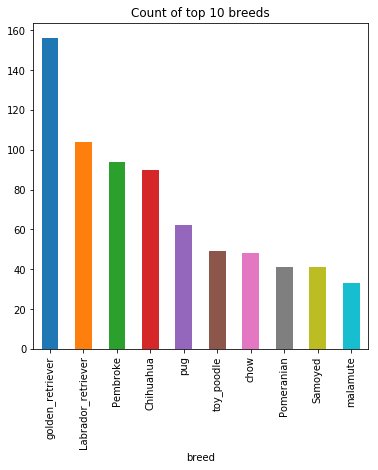

In [260]:
%matplotlib inline
df_ratings.plot(kind='bar',figsize= [6,6]);
plt.title('Count of top 10 breeds');

### 2. Relation between dog stage and numerator rating

In [250]:
twitter_archive_master.groupby('dog_stage')['rating_numerator'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
None,1662.0,11.253911,2.164634,10.0,10.00,11.0,12.0,30.0
doggo,72.0,11.930556,1.237061,10.0,11.00,12.0,13.0,14.0
floofer,7.0,12.000000,1.154701,10.0,11.50,12.0,13.0,13.0
pupper,201.0,11.114428,1.575386,10.0,10.00,11.0,12.0,27.0
puppo,22.0,12.045455,1.214095,10.0,11.25,12.0,13.0,14.0


### 3.Top 10 dog names

In [263]:
is_not_none =  twitter_archive_master['name']!= 'None'
not_none_df = twitter_archive_master[is_not_none]
top_names = not_none_df['name'].value_counts().nlargest(10)
top_names

Charlie    10
Cooper     10
Oliver     10
Penny       9
Lucy        9
Tucker      9
Winston     8
Sadie       8
Lola        7
Toby        7
Name: name, dtype: int64

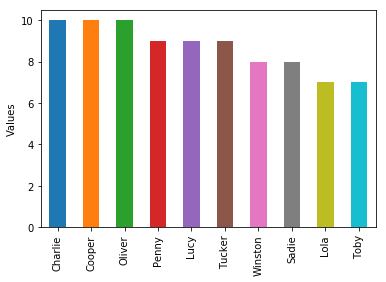

In [267]:
plt.ylabel('Values')
top_names.plot(kind="bar");